# Assignment - Bike Sharing Demand Prediction - Visalakshi G

## Business Objective

<font color=blue> The company needs to predict the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demand varies with different features.<br> They can manipulate the business strategy to meet the demand levels and meet the customer's expectations accordingly. Further, the model will be a good way for management to understand the demand dynamics of a new market.<br>
</font>

## Problem analysis and approach

This problem can be solved using Linear Regression. Company needs a solution with 
1. A model to predict demand with accuracy.
2. Insights into the significant relationships that exist between demand and available predictors,ie, how well these features can explain the demand for bike sharing.

Analysis is carried out using a Mixed Feature Selection Approach. 15 features are selected algorithmically using Recursive Feature Elimination. Further selection is done manually by looking at multicollinearity and statistical significance of features and overall fit of the model. 
The 10 most significant features to understand demand have been reported. 

The data set is randomly divided into training and test data. 
`Final Model` is built on training data set explains 84% of the variability  and  achieves 82% on test data.  

Approach :    
- Data has been cleaned to drop outliers that might affect the model adversely
- The model has been verified for Multicollinearity effects. 
- Residual Analysis has been carried out and the model satisfies the assumptions of Linear Regression (Residuals follow a normal distribution, Errors exhibit  homoscedasticity)
- Q-Q plot between residual distribution and normal distribution shows that residuals approximately follow a normal distribution
- Further Lag plot shows there is no auto-correlation in data. 
- Model is stable at 82%(+/-13%) coefficient of determination at 95% CI, ascertained through cross validation.
- Features in the order of influence has been reported by standardizing all predictor values. 
- Outliers dropped during Data Understanding phase deems further analysis from business perspective.



## Task 1: Reading and Understanding the data

### 1.1 Import necessary modules

In [90]:
import warnings
warnings.filterwarnings("ignore")

In [91]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

### 1.2 Read the data

In [92]:
f='day.csv' #Dataset file given for Assignment

dir_path = os.path.dirname(os.path.realpath(f))   #Find file location

print('\033[1m'+'Bikes Dataset file location on local machine: '+dir_path) #write dataset location

df = pd.read_csv(f,parse_dates=True) #Given data set is day.csv 

df.head()

Bikes Dataset file location on local machine: /home/visali/dds/ml/assignment


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [93]:
df.shape #Check the size of dataset (number of rows and columns)

(730, 16)

In [94]:
print('There are ',df.shape[0],'rows and ',df.shape[1],' columns in given data set')

There are  730 rows and  16  columns in given data set


In [95]:
df.info #Check the data info

<bound method DataFrame.info of      instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  01-01-2018       1   0     1        0        1           1   
1          2  02-01-2018       1   0     1        0        2           1   
2          3  03-01-2018       1   0     1        0        3           1   
3          4  04-01-2018       1   0     1        0        4           1   
4          5  05-01-2018       1   0     1        0        5           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
725      726  27-12-2019       1   1    12        0        5           1   
726      727  28-12-2019       1   1    12        0        6           0   
727      728  29-12-2019       1   1    12        0        0           0   
728      729  30-12-2019       1   1    12        0        1           1   
729      730  31-12-2019       1   1    12        0        2           1   

     weathersit       temp     atemp      hum  windspee

In [96]:
df.describe()   #Understand the data spread 

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [97]:
df.dtypes  #understand the data types

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [98]:
print(df.isnull().sum())  #Check if any null/missing values in the data set. We do not have any missing values in given data

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


**No missing values in the data**

In [99]:
df_dup = df

# Checking for duplicates and dropping the entire duplicate row if any
df_dup.drop_duplicates(subset=None, inplace=True)
df_dup.shape

(730, 16)

**No duplicate information in the data set**

In [100]:
df['dteday'] =  pd.to_datetime(df['dteday'],format='%d-%m-%Y')
df['dteday'].dtype

dtype('<M8[ns]')

In [101]:
df['year'] = pd.DatetimeIndex(df['dteday']).year
df['month'] = pd.DatetimeIndex(df['dteday']).month

Information:  instant, dteday, casual and registered columns can be dropped -  instant is the just the serial number of the record, dteday is redundant because the required data for analysis is contained in month,year and  casual + registered = cnt

In [102]:
# Dropping the columns as correct year and month are extracted from the date.

df.drop(['yr','mnth'],axis=1,inplace=True)

In [103]:
# Dropping the dteday,instant,casual and registered columns.

df.drop(['dteday','instant','casual','registered'],axis=1,inplace=True)

In [104]:
# Renaming some columns for better understanding

df.rename(columns={'hum':'humidity','cnt':'count'},inplace=True)

In [105]:
df.head()

,season,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count,year,month
0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,2018,1
1,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,2018,1
2,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,2018,1
3,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,2018,1
4,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,2018,1


## Task 2. EDA & Data Preparation

In [106]:
print(df.columns)

Index(['season', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp',
       'atemp', 'humidity', 'windspeed', 'count', 'year', 'month'],
      dtype='object')


### 2.1 Visualization of categorical variables

In [107]:
df.season.unique() #season (1:spring, 2:summer, 3:fall, 4:winter)

array([1, 2, 3, 4])

In [108]:
df['season'] = df['season'].map({1:'spring',2:'summer',3:'fall',4:'winter'})

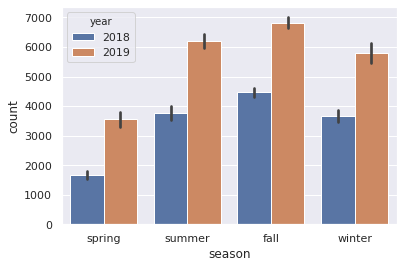

In [109]:
sns.barplot(x='season',y='count',hue='year',data=df)
plt.show()

In [110]:
df[['count', 'season']].groupby(['season'], as_index = True).mean().sort_values(by = 'count')

,count
season,
spring,2608.411111
winter,4728.162921
summer,4992.331522
fall,5644.303191


**Observation: Over 31% of overall rentals happened in Fall. Summer and winter are follwed with 28 and 26% of overall bookings.**

In [111]:
df['weathersit'] = df['weathersit'].map({1:'Clear',2:'Mist',3:'Light Snow',4:'Heavy Rain'}) #weathersit information

* 1.Clear, Few clouds, Partly cloudy, Partly cloudy
* 2.Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
* 3.Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
* 4.Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

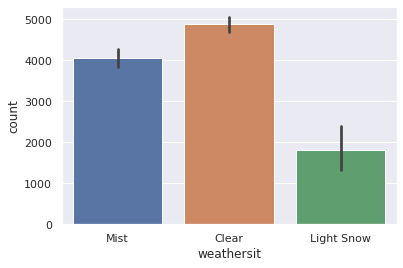

In [112]:
sns.barplot('weathersit','count',data=df)
plt.show()   #bar plot of weathersit Vs count

**Observation: More bikes are hired on Clear/Partly cloudy days**

In [113]:
#workingday : if day is neither weekend nor holiday is 1, otherwise is 0.

df['workingday'] = df['workingday'].map({1:'working_day',0:'Holiday'})

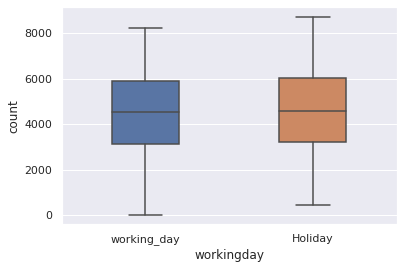

In [114]:
sns.boxplot('workingday','count',data=df,width=0.4)
plt.show() #box plot of workingday vs count

**Observation: More bikes are hired on working day.Almost 69% of the bike booking were happening in ‘workingday’ with a median of close to 5000 booking (for the period of 2 years)**

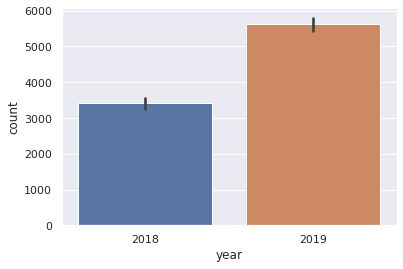

In [115]:
sns.barplot('year','count',data=df) #Analyse year bar plot
plt.show()

**Observation:Bike hiring increased in 2019 compared to 2018**

In [116]:
#month ( 1 to 12) encoding  

df['month'] = df['month'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

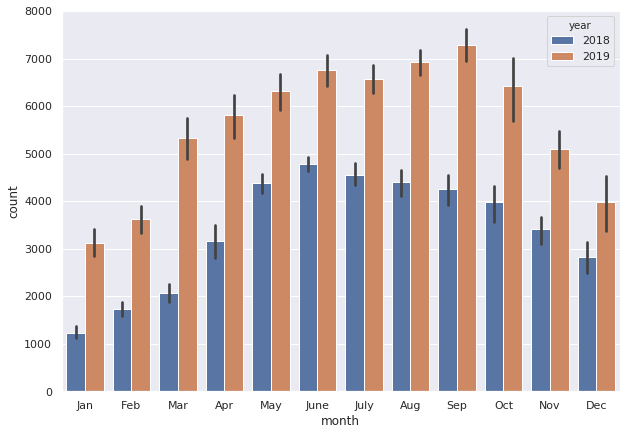

In [117]:
plt.figure(figsize=(10,7))
sns.barplot('month','count',hue='year',data=df) #bar plot of month vs count with year as hue
plt.show()

**Observation: Bike rentals are maximum in September and in the months around September as seen in season analysis.**

In [118]:
#weekday encoding
df['weekday'] = df['weekday'].map({0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'})

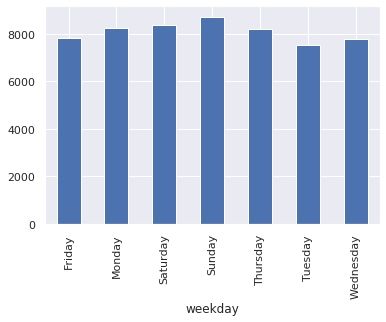

In [119]:
df.groupby('weekday')['count'].max().plot(kind='bar')
plt.show()

**Observation: Bike rentals are maximum on Sunday followed by Saturday**

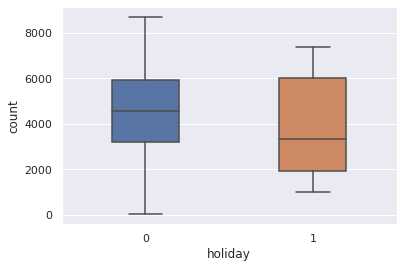

In [120]:
sns.boxplot('holiday','count',data=df,width=0.4) #holiday boxplot
plt.show()

**Overall observations from categorical variable analysis**
- From the season vs rentals per day plot , fall has the highest average rentals followed by summer. 
- Looking at year by year rentals, 2019 had an increase in rentals compared to 2018.
- From the month wise plot, September has the highest rentals, followed by the months surrounding it.Similar trend is seen in season analysis as well.
- Holidays show higher rental count compared to working days.More than 90% of the bike rentals were happening when it is not a holiday which means this data is clearly biased. This indicates, holiday CANNOT be a good predictor for the dependent variable(count). 
- There is no significant difference between rentals vs weekdays, except that Thursdays and Sundays have a higher variation in rentals than others.  

In [121]:
# Dropping outliers in Categorical Variables 
df = df.drop(index = df[(df['season'] == 'spring') & (df['count'] > 7000)].index)

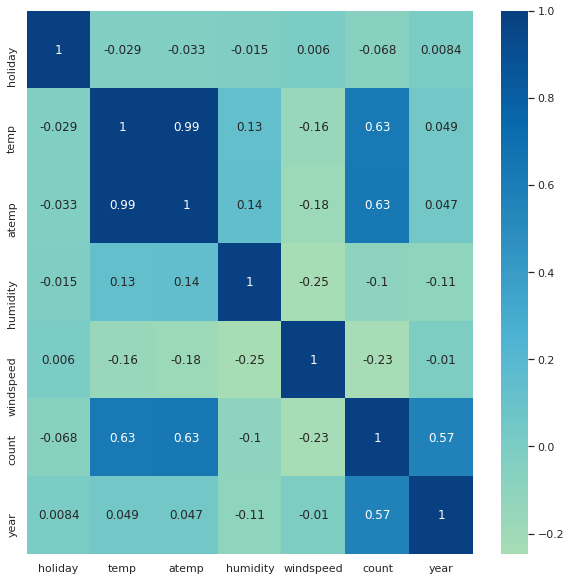

In [122]:
# correlation among variables
plt.figure(figsize=[10,10])
sns.heatmap(df.corr(),cmap='GnBu',center=0,annot=True)
plt.show()

**temp has highest correlation with count which is followed by year**

### 2.2 Visualisation of Continuous variables

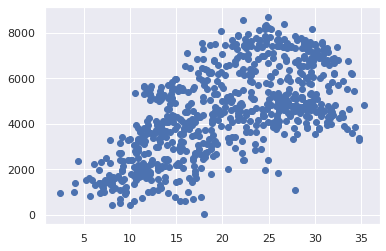

In [123]:
plt.scatter(x='temp',y='count',data=df)
plt.show()  #scatter plot of temp vs count

**Observation: Bike rentals increased at higher temperatures.**

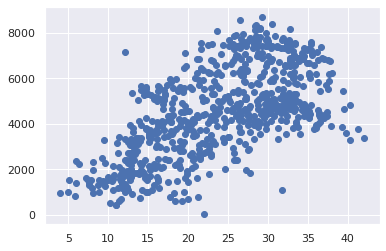

In [124]:
plt.scatter(x='atemp',y='count',data=df) #scatter plot of atemp vs count
plt.show()

**Bike rentals observed at higher feel-like temperatures**

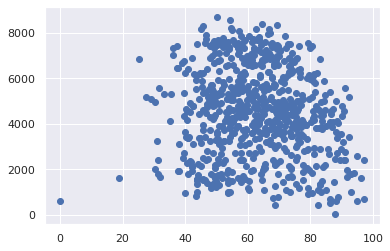

In [125]:
plt.scatter('humidity','count',data=df) #scatter plot of humidity vs count
plt.show()

**Observation: Bike rentals increased with humidity.**

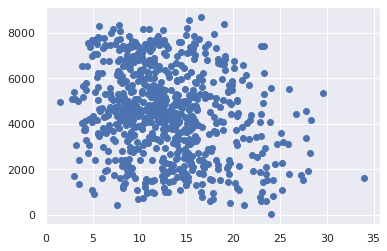

In [126]:
plt.scatter('windspeed','count',data=df)
plt.show()  #scatter plot of windspeed vs count

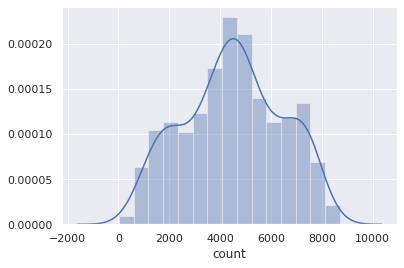

In [127]:
sns.distplot(df['count'])
plt.show()  #dist plot of target variable (count)

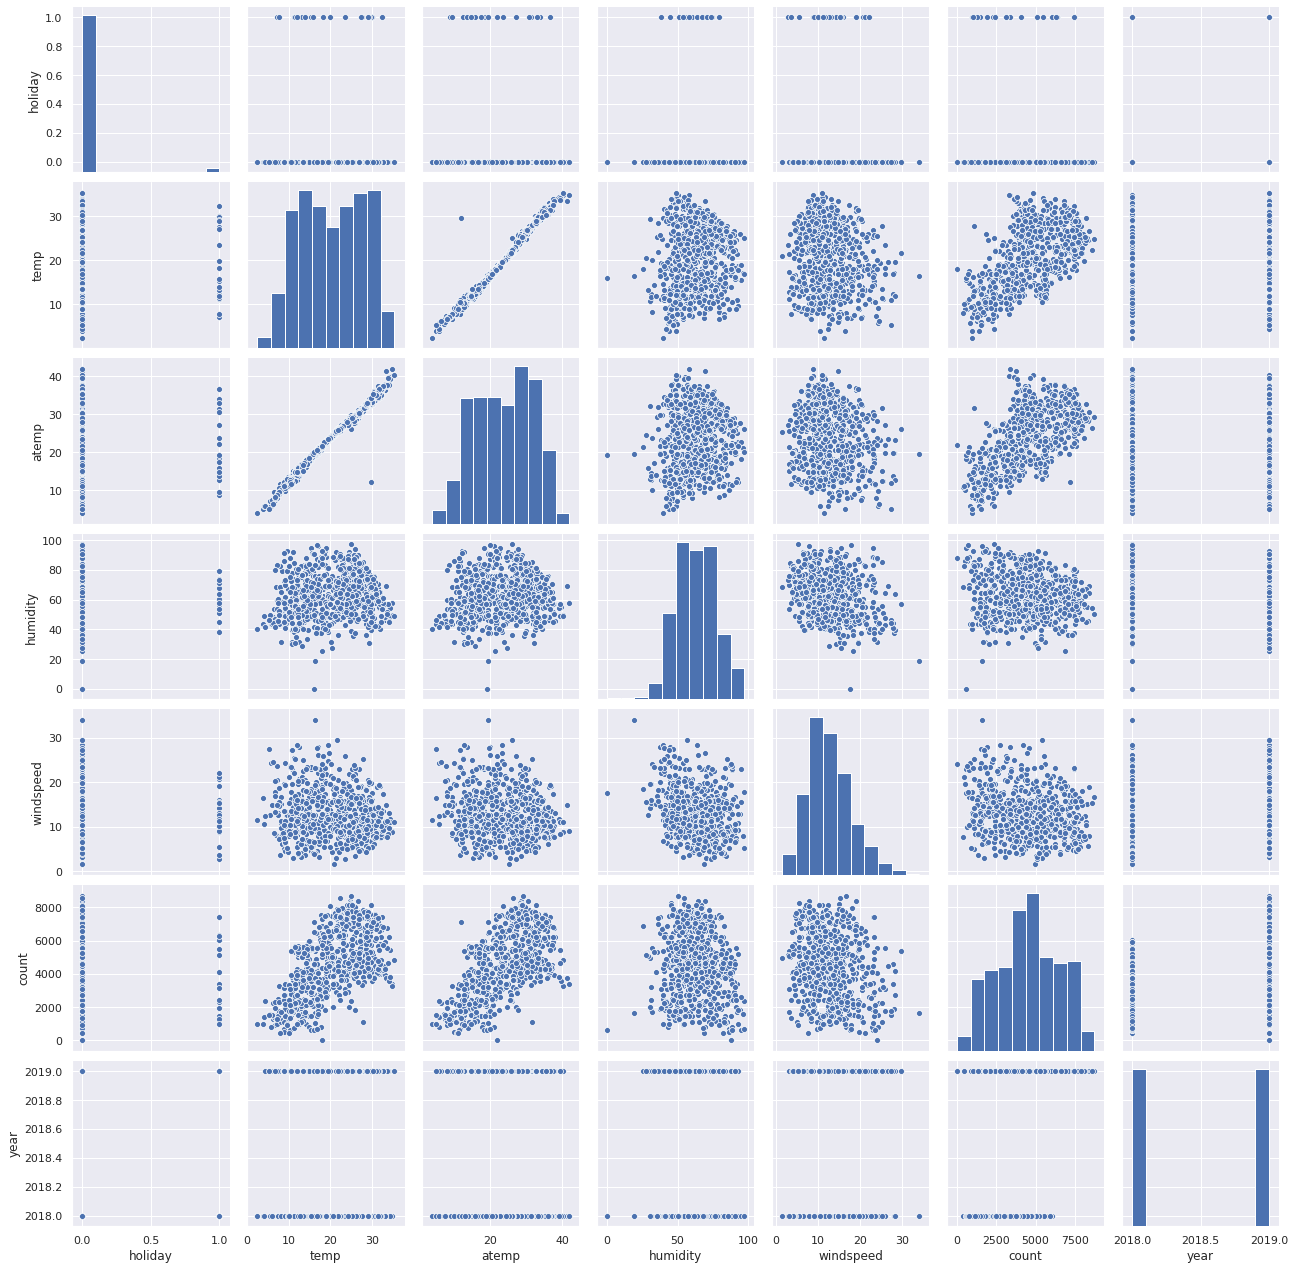

In [128]:
sns.pairplot(df)
plt.show()  #paitplot of continuous variables

**Overall Observations from continuous variables analysis**
- temp and atemp are correlated.
- The number of rentals per day seem to be increasing with temperature and adjusted temperature
- adjusted temperature and temperature have similar trends 
- temp vs count has two outliers between 15 and 30
- atemp vs count has two outliers between 20 and 35
- humidity vs count has two outliers below 20 
- windspeed vs count has one outlier above 30


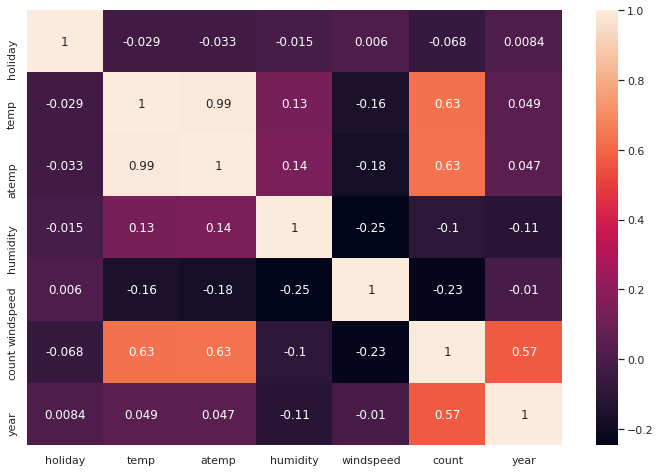

In [129]:
plt.figure(figsize = (12,8))
sns.heatmap(df.corr(),annot=True)
plt.show()  #heatmap of continuous variables to analyse the correlation

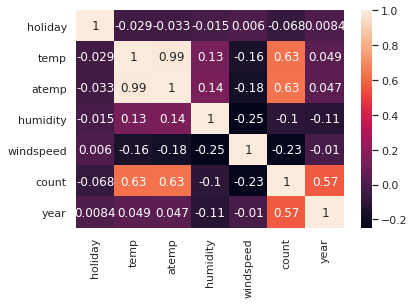

In [130]:
data= df[['temp','atemp','humidity','windspeed']]
sns.heatmap(df.corr(),annot=True)
plt.show() #correlation 

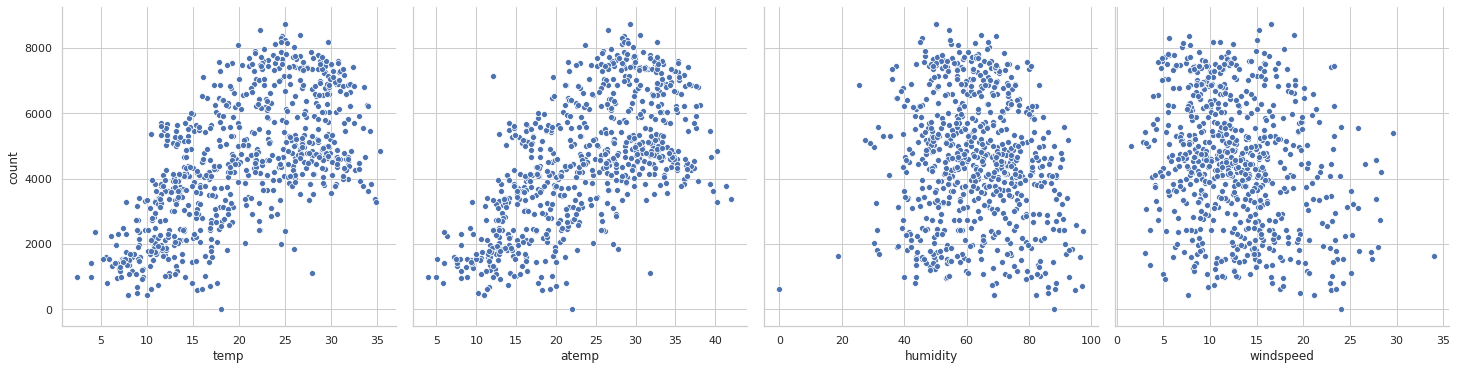

In [131]:
sns.set_style("whitegrid") #pairplot of temp,humidity,windspeed and count
sns.pairplot(data=df,x_vars=['temp','atemp','humidity','windspeed'],y_vars='count',kind='scatter',height=5,aspect=1);

In [132]:
## Dropping outliers in continuous variables
# outliers in temp
df = df.drop(index = df[(df['temp'] > 15) & (df['temp'] < 20) & (df['count'] < 100)].index)
df = df.drop(index = df[(df['temp'] > 25) & (df['temp'] < 30) & (df['count'] < 2000)].index)


# outliers in atemp
df = df.drop(index = df[(df['atemp'] > 20) & (df['atemp'] < 25) & (df['count'] < 100)].index)
df = df.drop(index = df[(df['atemp'] > 30) & (df['atemp'] < 35) & (df['count'] < 2000)].index)


#outliers in humidity
df = df.drop(index = df[(df['humidity'] < 20)].index)

#outliers in windspeed
df = df.drop(index = df[(df['windspeed'] > 30)].index)



In [133]:
# Looking at correlation with continuous variables 
correlation_data = df[['temp','atemp','humidity','windspeed','count']].corr()['count'].apply(lambda x : round(x,4))
correlation_data = pd.DataFrame(correlation_data).sort_values(by='count',ascending=False)
correlation_data.drop(index=['count'],inplace=True)

In [134]:
correlation_data.head()

,count
atemp,0.6398
temp,0.6366
humidity,-0.1101
windspeed,-0.2163


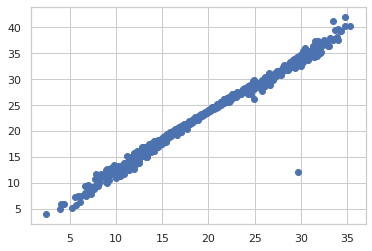

In [135]:
plt.scatter('temp','atemp',data=df)
plt.show()

**Observations from above analysis and visualisations: atemp and temp are highly correlated. Humidity has lowest correlation. To avoid multicollinearity, atemp can be dropped.**

In [136]:
df.drop('atemp',axis=1,inplace=True)

In [137]:
df.head()

,season,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count,year,month
0,spring,0,Monday,working_day,Mist,14.110847,80.5833,10.749882,985,2018,Jan
1,spring,0,Tuesday,working_day,Mist,14.902598,69.6087,16.652113,801,2018,Jan
2,spring,0,Wednesday,working_day,Clear,8.050924,43.7273,16.636703,1349,2018,Jan
3,spring,0,Thursday,working_day,Clear,8.200000,59.0435,10.739832,1562,2018,Jan
4,spring,0,Friday,working_day,Clear,9.305237,43.6957,12.522300,1600,2018,Jan


In [138]:
df[['temp','humidity','windspeed']].corr()

,temp,humidity,windspeed
temp,1.000000,0.122616,-0.160269
humidity,0.122616,1.000000,-0.246510
windspeed,-0.160269,-0.246510,1.000000


**Observation: No significant correlation between temp, humidity and windspeed.**

### 2.3 Categorical Indicator Variables

In [139]:
#create dummy varibales for nominal categorical data variables(seasons,working_day,weather,months and week_day)
seasons = pd.get_dummies(df['season'],drop_first=True)

working_day = pd.get_dummies(df['workingday'],drop_first=True)

weather= pd.get_dummies(df['weathersit'],drop_first=True)

months= pd.get_dummies(df['month'],drop_first=True)

week_day= pd.get_dummies(df['weekday'],drop_first=True)

In [140]:
df = pd.concat([df,seasons,working_day,weather,months,week_day],axis=1)

In [141]:
df.head()

,season,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count,year,...,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,spring,0,Monday,working_day,Mist,14.110847,80.5833,10.749882,985,2018,...,0,0,0,0,1,0,0,0,0,0
1,spring,0,Tuesday,working_day,Mist,14.902598,69.6087,16.652113,801,2018,...,0,0,0,0,0,0,0,0,1,0
2,spring,0,Wednesday,working_day,Clear,8.050924,43.7273,16.636703,1349,2018,...,0,0,0,0,0,0,0,0,0,1
3,spring,0,Thursday,working_day,Clear,8.200000,59.0435,10.739832,1562,2018,...,0,0,0,0,0,0,0,1,0,0
4,spring,0,Friday,working_day,Clear,9.305237,43.6957,12.522300,1600,2018,...,0,0,0,0,0,0,0,0,0,0


In [142]:
# Dropping the categorical variables since dummy variables are created.

df.drop(['season','workingday','weathersit','weekday','month'],axis=1,inplace=True)

In [143]:
df.head()

,holiday,temp,humidity,windspeed,count,year,spring,summer,winter,working_day,...,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,14.110847,80.5833,10.749882,985,2018,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,0,14.902598,69.6087,16.652113,801,2018,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,0,8.050924,43.7273,16.636703,1349,2018,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0,8.200000,59.0435,10.739832,1562,2018,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0,9.305237,43.6957,12.522300,1600,2018,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [144]:
df[['Sunday','Saturday']].corr()

,Sunday,Saturday
Sunday,1.000000,-0.164922
Saturday,-0.164922,1.000000


In [145]:
df.drop('Saturday',axis=1,inplace=True)

## Task 3: Split the data into train and test sets

In [146]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer

In [147]:
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 120)

### 3.1 Rescaling

In [148]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [149]:
# Apply scaler() to numerical columns 

num_vars=['temp','humidity','windspeed','count']
scaler = MinMaxScaler()
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])


**Dividing into X and Y sets for the model building.**


In [150]:
y_train = df_train.pop('count')
X_train = df_train

## Task 4: Building a linear model using Linear Regression

### 4.1 Assumptions of Linear Regression:

* The error terms are normally distributed.
* The training and testing accuracy are nearly equal hence there is no Overfit/Underfit situation.
* The predicted values have linear relationship with the actual values.

### 4.2 Modelling approach

- 15 columns are selected using RFE
- Redundant features are eliminated based on p-value

In [151]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [152]:
# Running RFE with output number of variables=15

lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm,n_features_to_select=15,step=1) # running RFE
rfe = rfe.fit(X_train, y_train)

In [153]:
# RFE Feature Ranking
rfe_ranking = pd.DataFrame({'rank' : rfe.ranking_, 'support': rfe.support_, 'features' : X_train.columns}).sort_values(by='rank',ascending=True)
rfe_ranking

,rank,support,features
0,1,True,holiday
21,1,True,Sep
20,1,True,Oct
18,1,True,May
17,1,True,Mar
15,1,True,July
10,1,True,Mist
9,1,True,Light Snow
26,1,True,Wednesday
7,1,True,winter


In [154]:
col = rfe_ranking.loc[rfe_ranking['rank'] == 1,'features'].values #selected features
col

array(['holiday', 'Sep', 'Oct', 'May', 'Mar', 'July', 'Mist',
       'Light Snow', 'Wednesday', 'winter', 'temp', 'humidity',
       'windspeed', 'spring', 'year'], dtype=object)

In [155]:
#Define methods to print summary and vif of the model

import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

def ols_summary(y,X) : 
    X_train_sm = sm.add_constant(X)
    model = sm.OLS(y,X_train_sm).fit()
    print(model.summary())
    return model
    
def vif(X) : 
    df1 = sm.add_constant(X)
    vif = [variance_inflation_factor(df1.values,i) for i in range(df1.shape[1])]
    vif_frame = pd.DataFrame({'vif' : vif[0:]},index = df1.columns).reset_index()
    vif_frame['vif'] = vif_frame['vif'].round(decimals=2)
    print(vif_frame.sort_values(by='vif',ascending=False))



#### Model 1
- Using features selected by RFE : 
- 'year', 'Sunday', 'Saturday', 'november', 'january', 'december',
- 'winter', 'july', 'spring', 'holiday', 'workingday', 'humidity', 'temp',
- 'windspeed', 'light snow/rain'

In [156]:
ols_summary(y_train,X_train[col]) # Running the linear model

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     192.0
Date:                Sun, 04 Oct 2020   Prob (F-statistic):          4.62e-194
Time:                        12:05:12   Log-Likelihood:                 510.54
No. Observations:                 506   AIC:                            -989.1
Df Residuals:                     490   BIC:                            -921.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -477.8749     16.468    -29.018      0.0

In [157]:
vif(X_train[col])

         index          vif
0        const  17074799.06
11        temp         3.35
14      spring         3.05
10      winter         2.60
12    humidity         2.31
7         Mist         1.78
3          Oct         1.53
8   Light Snow         1.42
6         July         1.41
4          May         1.22
2          Sep         1.21
13   windspeed         1.21
5          Mar         1.13
1      holiday         1.05
9    Wednesday         1.05
15        year         1.05


### 4.3 Feature Elimination based on p-value

#### Model 2

**Dropping 'wednesday' due to high p-value**

In [158]:
del_feature = 'Wednesday'
col = col[col!=del_feature]
col

array(['holiday', 'Sep', 'Oct', 'May', 'Mar', 'July', 'Mist',
       'Light Snow', 'winter', 'temp', 'humidity', 'windspeed', 'spring',
       'year'], dtype=object)

In [159]:
ols_summary(y_train,X_train[col])
vif(X_train[col])

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     204.7
Date:                Sun, 04 Oct 2020   Prob (F-statistic):          1.40e-194
Time:                        12:05:12   Log-Likelihood:                 509.00
No. Observations:                 506   AIC:                            -988.0
Df Residuals:                     491   BIC:                            -924.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -479.0660     16.487    -29.057      0.0

#### Model 3

**Dropping 'winter' as per it's p-value**

In [160]:
del_feature = 'winter'
col = col[col!=del_feature]
col

array(['holiday', 'Sep', 'Oct', 'May', 'Mar', 'July', 'Mist',
       'Light Snow', 'temp', 'humidity', 'windspeed', 'spring', 'year'],
      dtype=object)

In [161]:
ols_summary(y_train,X_train[col])
vif(X_train[col])

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     218.3
Date:                Sun, 04 Oct 2020   Prob (F-statistic):          1.09e-194
Time:                        12:05:13   Log-Likelihood:                 506.45
No. Observations:                 506   AIC:                            -984.9
Df Residuals:                     492   BIC:                            -925.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -480.6798     16.538    -29.066      0.0

#### Model 4

**Dropping Mar**

In [162]:
del_feature = 'Mar'
col = col[col!=del_feature]
col

array(['holiday', 'Sep', 'Oct', 'May', 'July', 'Mist', 'Light Snow',
       'temp', 'humidity', 'windspeed', 'spring', 'year'], dtype=object)

In [163]:
ols_summary(y_train,X_train[col])
vif(X_train[col])

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     231.6
Date:                Sun, 04 Oct 2020   Prob (F-statistic):          8.77e-194
Time:                        12:05:13   Log-Likelihood:                 501.47
No. Observations:                 506   AIC:                            -976.9
Df Residuals:                     493   BIC:                            -922.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -482.0008     16.679    -28.898      0.0

#### Model 5

**Dropping May as per it's p-value**

In [164]:
del_feature = 'May'
col = col[col!=del_feature]
col

array(['holiday', 'Sep', 'Oct', 'July', 'Mist', 'Light Snow', 'temp',
       'humidity', 'windspeed', 'spring', 'year'], dtype=object)

In [165]:
ols_summary(y_train,X_train[col])
vif(X_train[col])

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     249.3
Date:                Sun, 04 Oct 2020   Prob (F-statistic):          1.36e-193
Time:                        12:05:13   Log-Likelihood:                 498.15
No. Observations:                 506   AIC:                            -972.3
Df Residuals:                     494   BIC:                            -921.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -481.3713     16.770    -28.704      0.0

#### Model 6

**Dropping 'Nov' since it is present in winter**

In [166]:
del_feature = 'holiday'
col = col[col!=del_feature]
col

array(['Sep', 'Oct', 'July', 'Mist', 'Light Snow', 'temp', 'humidity',
       'windspeed', 'spring', 'year'], dtype=object)

In [167]:
ols_summary(y_train,X_train[col])
vif(X_train[col])

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     267.1
Date:                Sun, 04 Oct 2020   Prob (F-statistic):          2.78e-192
Time:                        12:05:13   Log-Likelihood:                 492.15
No. Observations:                 506   AIC:                            -962.3
Df Residuals:                     495   BIC:                            -915.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -479.0803     16.940    -28.282      0.0

**Verifying VIF for Mulitcollinearity**

In [168]:
vif(X_train[col])

         index          vif
0        const  16970575.12
6         temp         2.27
7     humidity         2.19
9       spring         1.86
4         Mist         1.74
5   Light Snow         1.39
3         July         1.36
8    windspeed         1.19
1          Sep         1.15
2          Oct         1.11
10        year         1.04


- VIF < 5 for selected features. No significant multicollinearity observed. Similar indicating comparison of R-squared and adjusted R-squared.

In [169]:
final_model = ols_summary(y_train,X_train[col])

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     267.1
Date:                Sun, 04 Oct 2020   Prob (F-statistic):          2.78e-192
Time:                        12:05:13   Log-Likelihood:                 492.15
No. Observations:                 506   AIC:                            -962.3
Df Residuals:                     495   BIC:                            -915.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -479.0803     16.940    -28.282      0.0

**Observations**
- 10 features have been selected. 
- All the features are statistically significant [low p-value]
- The model over is a good fit with Prob (F-statistic): 2.78e-192
- The model explains 84% variability in the training data. Adjusted R-square being 84.1%
- F-statistic is 267.1 (>1) and Prob(F-Statistic) indicate that overall model is significant.

## Task 5: Residual Analysis of the train data

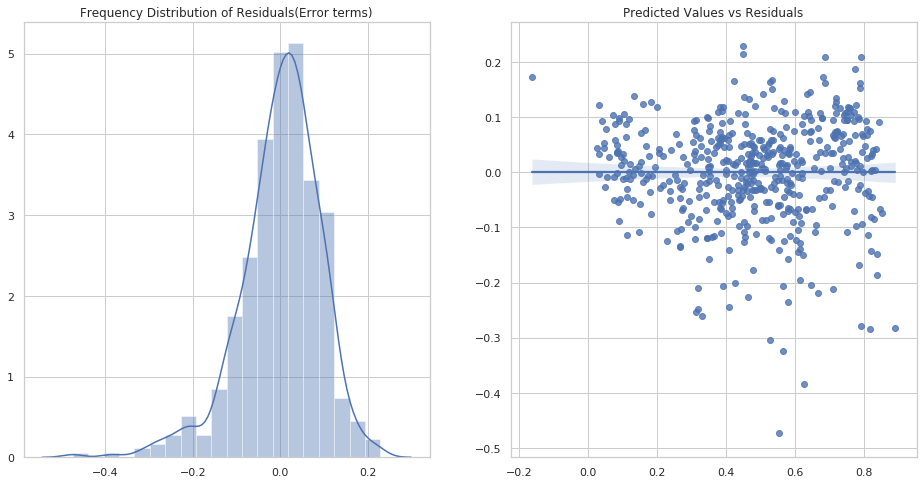

In [170]:
X_train_sm = sm.add_constant(X_train[col])

y_train_pred = final_model.predict(X_train_sm)
fig,ax = plt.subplots(1,2)
fig.set_figheight(8)
fig.set_figwidth(16)

ax[0].set(title='Frequency Distribution of Residuals(Error terms)')
sns.distplot(y_train-y_train_pred, bins=20, ax=ax[0])

ax[1].set(title='Predicted Values vs Residuals')
\
sns.regplot(y_train_pred,y_train-y_train_pred,ax=ax[1])
plt.show()

In [171]:
# Mean of Residuals
(y_train-y_train_pred).mean()

-2.020710125358634e-14

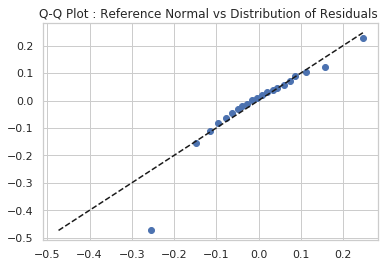

In [172]:
# Verifying the normality of distribution of residuals 
mean = (y_train-y_train_pred).mean()
std = (y_train-y_train_pred).std()

ref_normal = np.random.normal(mean,std,(y_train-y_train_pred).shape[0])


percs = np.linspace(0,100,21)
qn_ref_normal = np.percentile(ref_normal, percs)
qn_residual = np.percentile(y_train - y_train_pred , percs)

plt.plot(qn_ref_normal,qn_residual, ls="", marker="o")

x = np.linspace(np.min((qn_ref_normal.min(),qn_residual.min())), np.max((qn_ref_normal.max(),qn_residual.max())))
m = plt.plot(x,x, color="k", ls="--")
plt.title('Q-Q Plot : Reference Normal vs Distribution of Residuals ')
plt.savefig('q-q-plot.png')
plt.show()

- This plot further shows that the residual distribution is approximately normal for all test data with values within range of training data. 

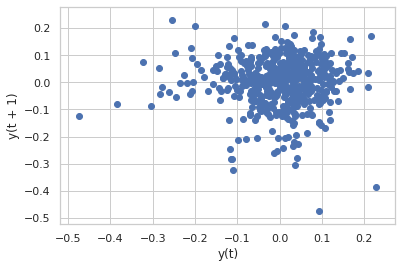

In [173]:
# lag plot to assess independence of data points
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR') #Added to avoid RGB warning of lagplot
from pandas.plotting import lag_plot
lag_plot(y_train-y_train_pred,lag=1)
plt.show()

- Lag plot of residuals shows no trend. Hence the error terms have constant variance 

**Hence, assumptions of Linear Regression are satisfied by this model**

## Task 6: Predictions

In [174]:
#Predict using test set
num_vars=['temp','humidity','windspeed','count']
df_test[num_vars]= scaler.fit_transform(df_test[num_vars])

In [175]:
y_test = df_test.pop('count') #create X & y of test set
X_test = df_test[col]

In [176]:
X_test = sm.add_constant(X_test)
y_test_pred = final_model.predict(X_test) #test set prediction

In [177]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_test_pred)) #r2_score of test set

0.8210135949425748


## Task 7: Model Evaluation

### 7.1 Model Predictions comparison and Accuracy

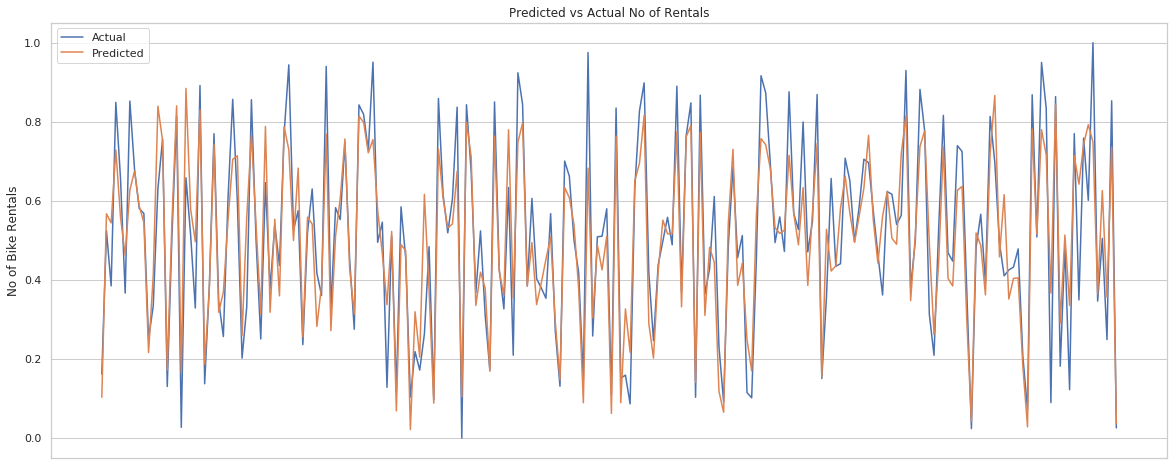

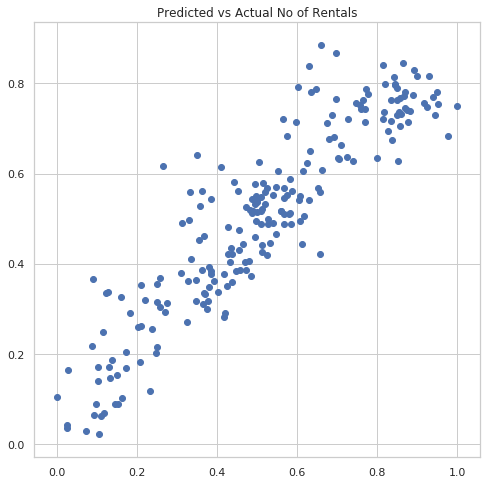

In [178]:
# Plotting Actual vs Predicted No of bike rentals 
fig,ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(20)
l1,=ax.plot(range(len(y_test)),y_test)
l2, = ax.plot(range(len(y_test_pred)),y_test_pred)
plt.legend([l1,l2],['Actual','Predicted'])
plt.title('Predicted vs Actual No of Rentals');
plt.ylabel('No of Bike Rentals')
plt.xticks([])
plt.show()

plt.figure(figsize=[8,8])
plt.scatter(y_test,y_test_pred);
plt.title('Predicted vs Actual No of Rentals');

In [179]:
#print R-squared of train and test sets, MSE value
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y_test, y_test_pred)
rsquared_test = r2_score(y_test, y_test_pred)
rsquared_train = r2_score(y_train, y_train_pred)
print('R-squared for train data:',round(rsquared_train,2))
print('R-squared for test data:',round(rsquared_test,2))
print('Mean Squared Error',round(mse,3))

R-squared for train data: 0.84
R-squared for test data: 0.82
Mean Squared Error 0.011


In [180]:
# n is number of rows in test dataset
n1 = X_train.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p1 = X_train.shape[1]

# We find the Adjusted R-squared using the formula
adjusted_r2_train = round(1-(1-rsquared_train)*(n1-1)/(n1-p1-1),4)


# n is number of rows in test dataset
n = X_test.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula
adjusted_r2_test = round(1-(1-rsquared_test)*(n-1)/(n-p-1),4)

print('Adjusted R-squared for train data: ',round(adjusted_r2_train,2))
print('Adjusted R-squared for test data: ',round(adjusted_r2_test,2))

Adjusted R-squared for train data:  0.83
Adjusted R-squared for test data:  0.81


### 7.2 Model Stability

In [181]:
# R-square using cross validation

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
clr = cross_val_score(lr,X_train[col],y_train,cv=10, scoring='r2')
clr

array([0.80316335, 0.89524027, 0.75266062, 0.89709947, 0.83985472,
       0.86190172, 0.86907901, 0.7170697 , 0.71996649, 0.87170839])

In [182]:
print("R-square at 0.95 confidence level : %0.2f (+/- %0.2f)" % (clr.mean(), clr.std() * 2)) #R-square at 95% confidence level

R-square at 0.95 confidence level : 0.82 (+/- 0.13)


In [183]:
col

array(['Sep', 'Oct', 'July', 'Mist', 'Light Snow', 'temp', 'humidity',
       'windspeed', 'spring', 'year'], dtype=object)

In [184]:
# standardizing numerical variables 

from sklearn.preprocessing import StandardScaler,MinMaxScaler
reg_features = col
scaler = MinMaxScaler()
data = X_train[col]
std_num = scaler.fit(data[['temp','windspeed','humidity']])


std_X_train = pd.DataFrame(data = scaler.transform(data[['temp','windspeed','humidity']]), columns=['temp','windspeed','humidity'])
for i in reg_features : 
    std_X_train[i] = data[i].values


reshaped_y_train = y_train.values.reshape(-1,1)

# Fitting linear regression model 
std_model = lr.fit(std_X_train, reshaped_y_train)

# Coefficients and intercept
result = pd.DataFrame(data = std_model.coef_, columns = std_X_train.columns, index=['MLR Coefficients']).T
result = result.sort_values(by='MLR Coefficients',ascending=False)
print('\nIntercept :',std_model.intercept_)
result


Intercept : [-479.08027226]


,MLR Coefficients
temp,0.456864
year,0.237549
Oct,0.085572
Sep,0.055711
Mist,-0.049022
July,-0.089319
windspeed,-0.119757
humidity,-0.139912
spring,-0.152564
Light Snow,-0.201144


* Upon standardized the values of predictor variables, the above values show that the top features influencing demand are ```temp```, followed by ```year``` , ```Oct``` and ```Sep```
* In case of continuous variables, the above data could be interpreted as - With every standard deviation increase in continuous variables, demand increases by `xxx`, when all other modelled paramters are held unchanged. 
* In case of categorical variables, the above data could be interpreted as - Compared to the reference level, the change in demand is `xxx`,, when all other modelled paramters are held unchanged. 

<span style='font-family:Georgia'>
    <font color = green>
        <h3> Hypothesis Testing : </h3>
    </font>
    <p> Hypothesis Testing States that<br>
        <blockquote>
            H0:B1=B2=...=Bn=0 <br>
            H1: at least one  Bi!=0
        </blockquote><br>
     </p>
     <div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight:</b> From above model coefficients, it is evident that all our coefficients are not equal to zero, which means we <b>REJECT the NULL HYPOTHESIS</b> 
    </span>    
</div>
</span>

<span style='font-family:Georgia'>
    <font color= blue>
<h2>   
     Model Conclusive Summary         
</h2>

<div class="alert alert-block alert-success">
    <span style='font-family:Georgia'>
        <p><b>As per the final model, the top 5 predictor variables that influences bike booking are: </b></p><hr>
        <ol>
            <li><b>Temperature (Temp)</b><br> A coefficient value of ‘0.456864’ indicated that a temperature has significant impact on bike rentals </li>
            <li><b> Year </b><br>A coefficient value of ‘0.237549’ indicated that a year wise the rental numbers are increasing</li>
             <li><b>Oct and Sep (~ spring season) </b><br>Coefficient values of ‘0.085572’ and `0.055711` indicate that hire rate of bikes in Sep and Oct are increasing</li>
             <li><b>Light Snow (Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds) </b><br>Coefficient value of ‘-0.201144’ indicate that hiring rate decreases in light snow condition</li>
        </ol>
<hr>
    <h3>
    Recommendations
    </h3>
<p>It is recommended to give utmost importance to these variables while planning to achieve maximum bike rental booking.<br>
    As high temperature and good weather positively impacts bike rentals, it is recommended that bike availability and promotions to be increased during summer months to further increase bike rentals. 
        </p>
     </span> 
</div> 
</font>
</span>